<a href="https://colab.research.google.com/github/babupallam/Supervised-Learning-Classification-Algorithms/blob/main/03_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron
  - Type: Linear Classifier
  - Function: Binary Classification
  - Activation Function: Step Function (Heaviside Step Function)

  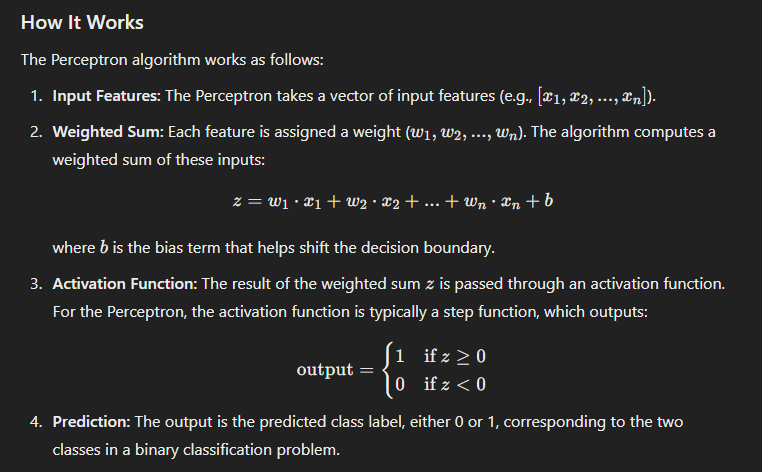

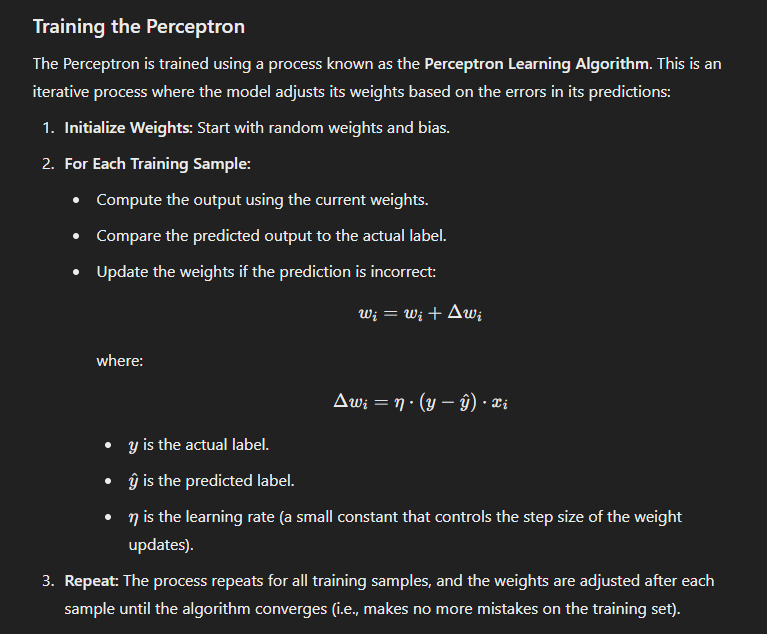

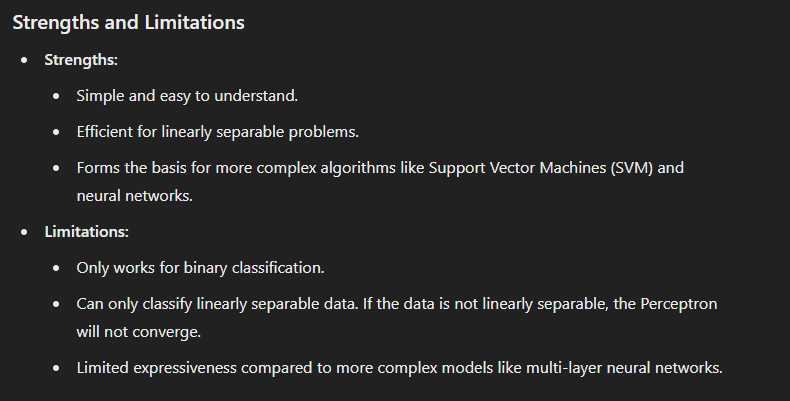

# Demo of the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


In [9]:
# Step 1: Generate a synthetic dataset

# We use make_classification to create a 2D dataset with two informative features. This dataset will be linearly separable, making it ideal for the Perceptron.

X, y = make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42
)

In [10]:

# Step 2: Train the Perceptron model

#The Perceptron model from scikit-learn is initialized with a maximum of 1000 iterations and trained using the generated dataset.


perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X, y)

Perceptron(random_state=42)

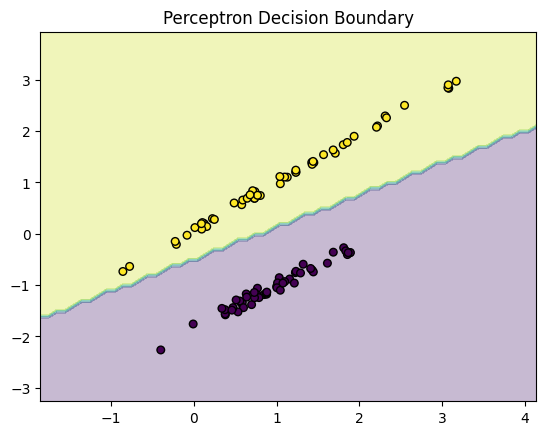

In [11]:

# Step 3: Visualize the decision boundary

#The plot_decision_boundary function creates a mesh grid over the feature space and plots the decision boundary learned by the Perceptron. The dataset points are also plotted to show how well the model separates the classes.


def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k')
    plt.title("Perceptron Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, perceptron)

In [12]:

# Step 4: Evaluate the model

# We use accuracy_score to measure how well the Perceptron classifies the training data.


y_pred = perceptron.predict(X)
accuracy = accuracy_score(y, y_pred)

accuracy

1.0


# Applications of Perceptron Model

### 1. **Binary Classification Problems**
   - **Spam Detection:** A Perceptron can be used to classify emails as either spam or not spam based on features like the presence of certain keywords, the length of the email, or the sender's address.
   - **Sentiment Analysis:** In text classification tasks, a Perceptron can distinguish between positive and negative sentiment in short text snippets, such as movie reviews or social media posts.

### 2. **Image Classification**
   - **Handwritten Digit Recognition:** The Perceptron was one of the earliest models used in the field of optical character recognition (OCR), specifically for recognizing handwritten digits. While modern deep learning models have largely replaced it, the Perceptron laid the groundwork for more complex neural networks.
   - **Binary Image Classification:** For simple tasks like distinguishing between two types of images (e.g., cats vs. dogs), if the features are linearly separable, a Perceptron can be effective.

### 3. **Speech Recognition**
   - **Phoneme Classification:** In early speech recognition systems, Perceptrons were used to classify phonemes, which are the distinct units of sound in speech. This is often the first step in recognizing spoken words.

### 4. **Medical Diagnosis**
   - **Disease Classification:** Perceptrons can be used in simple diagnostic systems where patients' symptoms (binary features) can be used to determine whether they have a certain disease or not. For example, given features like temperature, blood pressure, and specific test results, the model could classify patients as likely having a disease or not.

### 5. **Credit Risk Assessment**
   - **Loan Approval:** In financial institutions, a Perceptron could be used to classify loan applications as either approved or rejected based on features like credit score, income, employment history, and other financial indicators.

### 6. **Marketing and Customer Segmentation**
   - **Customer Churn Prediction:** Perceptrons can be used to predict whether a customer is likely to churn (i.e., stop using a service) based on their usage patterns, interaction history, and demographic data.
   - **Targeted Advertising:** The model can be employed to classify customers into different segments based on their likelihood of responding to a particular marketing campaign.

### 7. **Simple Control Systems**
   - **Autonomous Navigation:** In early robotics, Perceptrons were used in simple autonomous navigation systems to decide whether to turn left or right based on sensor inputs (e.g., proximity sensors).
   - **Binary Control Decisions:** Perceptrons can be used in control systems where binary decisions are required, such as turning a system on or off based on sensor readings.

### 8. **Natural Language Processing**
   - **Binary Text Classification:** Tasks like identifying whether a text belongs to a particular category (e.g., sports news vs. non-sports news) can be handled by a Perceptron, especially when using simple text features like word frequencies.

### 9. **Feature Selection and Engineering**
   - **Identifying Important Features:** The Perceptron’s simplicity makes it useful in the feature selection phase of machine learning pipelines. By analyzing the weights learned by the Perceptron, one can identify which features are most influential in the classification decision.

### 10. **Educational Purposes**
   - **Teaching Tool:** The Perceptron is widely used as an introductory teaching tool in machine learning and artificial intelligence courses to explain the basic concepts of linear classification, gradient descent, and neural networks.


# Application 1: Perceptron model for spam detection

In [13]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:

# Step 1: Generate a synthetic dataset
# Features: [contains 'free', contains 'win', contains 'money', length > 100]
# Target: 1 = spam, 0 = not spam


# The dataset consists of 100 samples (emails), each with 4 binary features. These features could represent, for example, whether the email contains certain words like "free," "win," "money," or if the length of the email exceeds a certain threshold.

#The target label y is generated using a simple rule: an email is classified as spam if it contains the word "free" or "win," or if it contains both "money" and is longer than a certain length.


np.random.seed(42)
X = np.random.randint(2, size=(100, 4))  # 100 emails, 4 binary features
y = (X[:, 0] | X[:, 1] | (X[:, 2] & X[:, 3]))  # simple rule to determine if it's spam


In [15]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [16]:
# Step 2: Train the Perceptron model
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)


Perceptron(random_state=42)

In [17]:
# Step 3: Evaluate the model
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [18]:
# Output the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        25

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



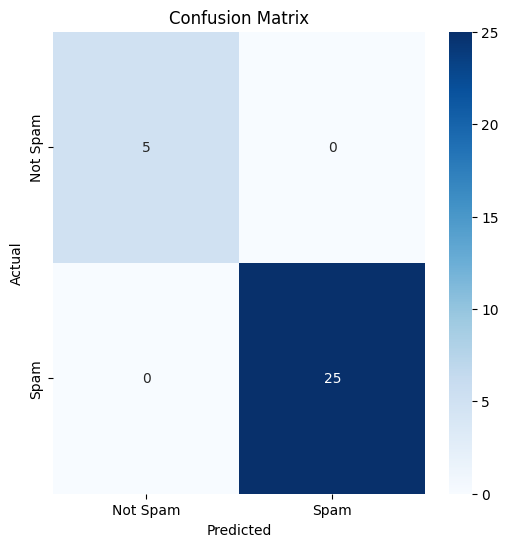

In [19]:
# Step 4: Visualize the results with a confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Application 2:  Credit Risk Assessment

In [21]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns



In [28]:
# Step 1: Create a synthetic dataset
np.random.seed(42)

# Simulate features: Credit Score, Income, Employment Status (0: Unemployed, 1: Employed)
#We simulate a dataset of 1,000 samples with three features: Credit Score, Income, and Employment Status.

n_samples = 1000
credit_scores = np.random.randint(300, 850, n_samples)
incomes = np.random.randint(20000, 150000, n_samples)
employment_status = np.random.randint(0, 2, n_samples)

In [29]:
#A simple rule is applied: loans are approved if the credit score is above 600, income is above 50,000, and the applicant is employed.

# Simple rule: approve if credit score > 600, income > 50000, and employed
labels = (credit_scores > 600) & (incomes > 50000) & (employment_status == 1)
labels = labels.astype(int)  # Convert boolean to int (0 or 1)

In [24]:
# Create a DataFrame
data = pd.DataFrame({
    'Credit Score': credit_scores,
    'Income': incomes,
    'Employment Status': employment_status,
    'Loan Approval': labels
})


In [25]:
# Step 2: Train a Perceptron model
X = data[['Credit Score', 'Income', 'Employment Status']]
y = data['Loan Approval']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)


Perceptron(random_state=42)

In [26]:
# Step 3: Evaluate the model
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


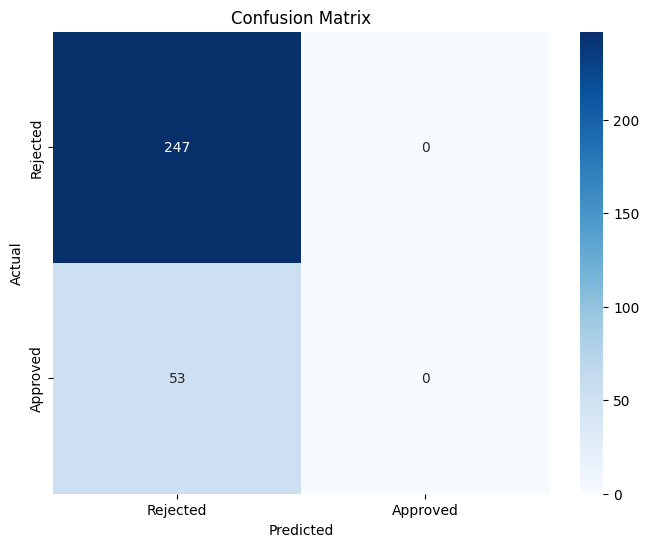

(0.8233333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.82      1.00      0.90       247\n           1       0.00      0.00      0.00        53\n\n    accuracy                           0.82       300\n   macro avg       0.41      0.50      0.45       300\nweighted avg       0.68      0.82      0.74       300\n')

In [27]:

# Step 4: Visualize the results
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy, report

# Application 3: Natural Language Processing (Identifying Objects into Catagory)

In [30]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [37]:
# We load a subset of the 20 Newsgroups dataset, selecting categories related to sports (rec.sport.baseball and rec.sport.hockey) and non-sports (sci.space and talk.politics.misc).


# Step 1: Load and preprocess the data
categories = ['rec.sport.baseball', 'rec.sport.hockey', 'sci.space', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# For simplicity, we'll classify between sports (baseball, hockey) and non-sports (space, politics)
sports_indices = [i for i, target in enumerate(newsgroups.target) if newsgroups.target_names[target].startswith('rec.sport')]
non_sports_indices = [i for i, target in enumerate(newsgroups.target) if not newsgroups.target_names[target].startswith('rec.sport')]

selected_indices = sports_indices + non_sports_indices
X = [newsgroups.data[i] for i in selected_indices]
y = [1 if i in sports_indices else 0 for i in selected_indices]  # 1 for sports, 0 for non-sports


In [38]:
# Step 2: Feature extraction using TfidfVectorizer

# We use the TfidfVectorizer to convert the text data into numerical features. This technique converts text to vectors of term frequency-inverse document frequency (TF-IDF), which is effective for text classification.

vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to 1000 features for simplicity
X_transformed = vectorizer.fit_transform(X)

In [34]:
# Step 3: Train the Perceptron model
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)


Perceptron(random_state=42)

In [35]:
# Step 4: Evaluate the model
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Non-Sports', 'Sports'])


In [36]:
accuracy, report


(0.8775510204081632,
 '              precision    recall  f1-score   support\n\n  Non-Sports       0.87      0.86      0.86       507\n      Sports       0.89      0.89      0.89       620\n\n    accuracy                           0.88      1127\n   macro avg       0.88      0.88      0.88      1127\nweighted avg       0.88      0.88      0.88      1127\n')

In [39]:
# Example texts to classify
example_texts = [
    "The baseball game last night was thrilling!",
    "The recent advancements in space technology are astounding.",
    "Hockey playoffs are the most exciting time of the year.",
    "The political debate last night was very heated and covered many topics.",
]

# Transform these texts using the same vectorizer used in training
example_transformed = vectorizer.transform(example_texts)

# Use the trained Perceptron model to predict the class
predictions = perceptron.predict(example_transformed)

# Mapping prediction to labels
prediction_labels = ['Sports' if pred == 1 else 'Non-Sports' for pred in predictions]

# Displaying the results
for text, label in zip(example_texts, prediction_labels):
    print(f"Text: '{text}'\nPredicted Label: {label}\n")


Text: 'The baseball game last night was thrilling!'
Predicted Label: Sports

Text: 'The recent advancements in space technology are astounding.'
Predicted Label: Non-Sports

Text: 'Hockey playoffs are the most exciting time of the year.'
Predicted Label: Sports

Text: 'The political debate last night was very heated and covered many topics.'
Predicted Label: Non-Sports

